In [3]:
### Obtaining of bounding box info
import xml.etree.ElementTree as ET

def get_bounding_boxes(annot):
    xml = annot
    tree = ET.parse(xml)
    root = tree.getroot()
    objects = root.findall('object')
    bbox = []
    for o in objects:
        bndbox = o.find('bndbox')
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)
        bbox.append((xmin,ymin,xmax,ymax))
        return bbox

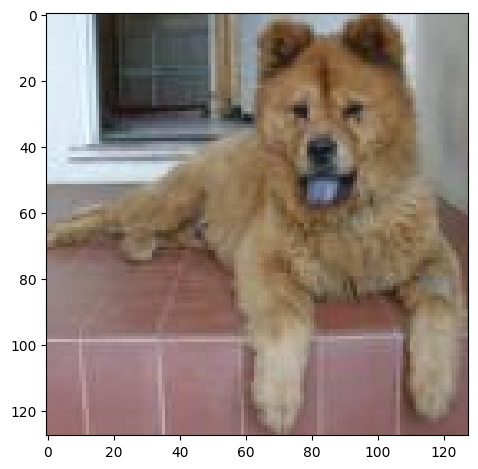

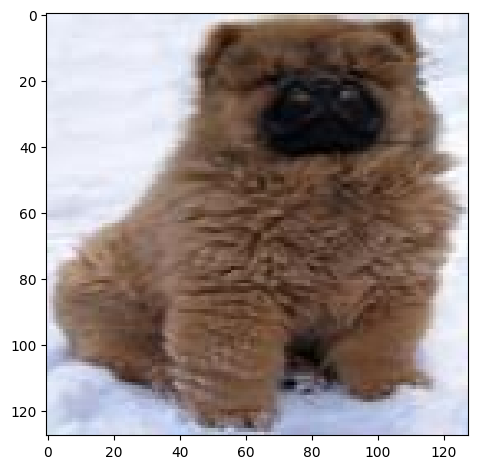

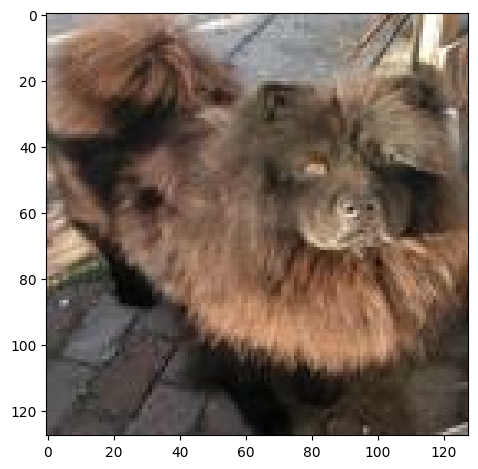

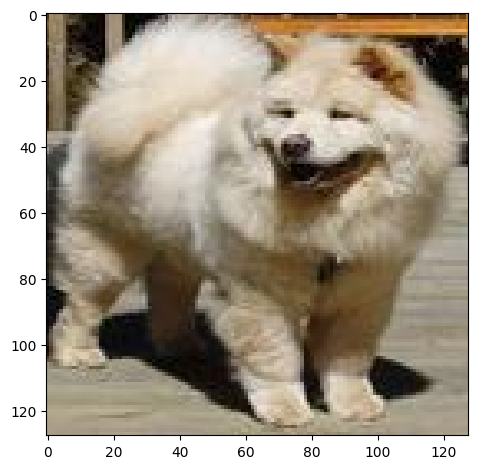

In [7]:
### Rescaling and Resizing images of four folders then saving in resized_images
import os
from PIL import Image
from skimage import io

imageClass = {
    'GSM': 'n02107574-Greater_Swiss_Mountain_dog',
    'FG': 'n02108915-French_bulldog',
    'chow': 'n02112137-chow',
    'MH': 'n02113978-Mexican_hairless'
}
imagePath = r'D:\dm\Images'  
annotationPath = r'D:\dm\Annotation'  

# Assuming you have defined or imported get_bounding_boxes function

for dogClass, folderName in imageClass.items():
    imageFiles = os.listdir(os.path.join(imagePath, folderName))
    annoFiles = os.listdir(os.path.join(annotationPath, folderName))

    for img, anno in zip(imageFiles, annoFiles):
        bboxes = get_bounding_boxes(os.path.join(annotationPath, folderName, anno))
        image = Image.open(os.path.join(imagePath, folderName, img))

        for i, bbox in enumerate(bboxes):
            cropImage = image.crop(bbox)
            resizeImage = cropImage.resize((128, 128))
            resizeImage.save(f'D:/dm/Images/resized_images/{dogClass}_{i}_{img}')

# Display the first 4 resized images
i = 0
for img in os.listdir('D:/dm/Images/resized_images'):
    if i >= 4:
        break
    img_path = os.path.join('D:/dm/Images/resized_images', img)
    img = io.imread(img_path)
    io.imshow(img)
    io.show()
    i += 1


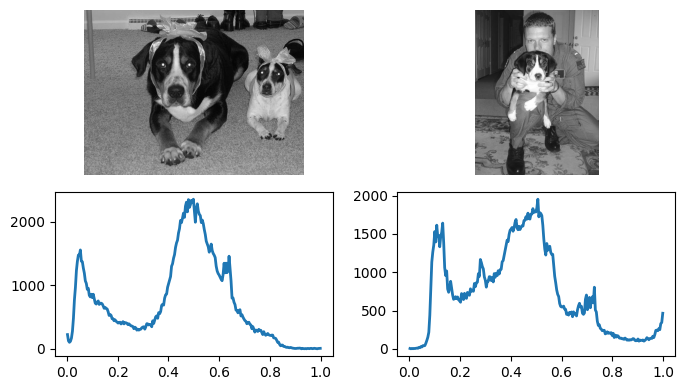

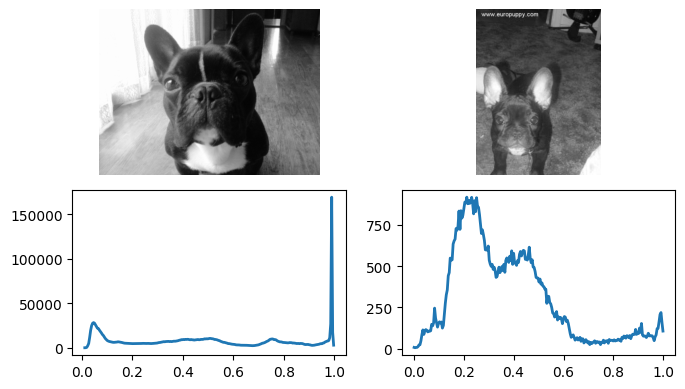

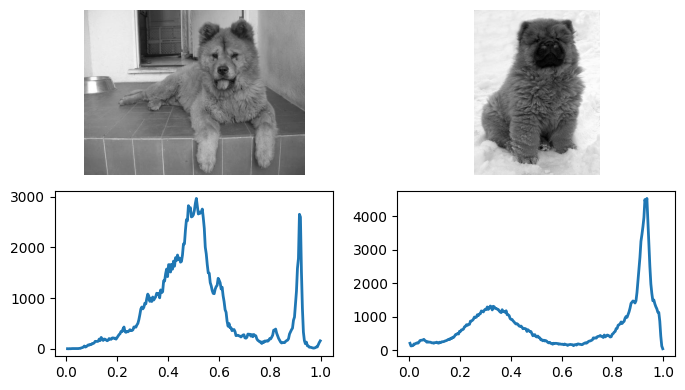

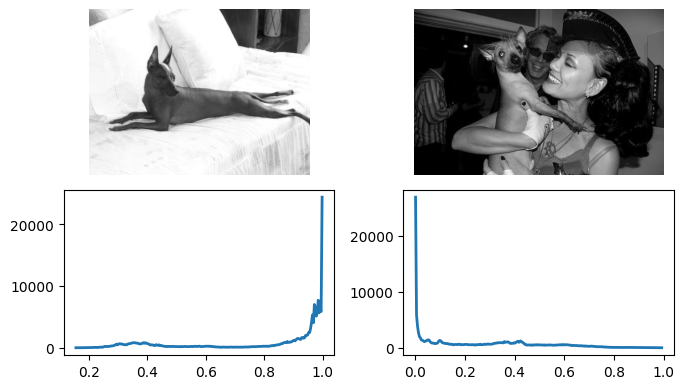

In [8]:
###converting into GrayScaling
from skimage import io, color, exposure
import matplotlib.pyplot as plt
import os
def process_and_plot_images(folder_path):
    files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')][:2]
fig, axes = plt.subplots(2, len(files), figsize=(7, 4))
for i, file_name in enumerate(files):

        image_path = os.path.join(folder_path, file_name)
        image = io.imread(image_path)
        gray_image = color.rgb2gray(image)
        hist, hist_centers = exposure.histogram(gray_image, nbins=256)
        axes[0, i].imshow(gray_image, cmap=plt.cm.gray)
        axes[0, i].axis('off')
        axes[1, i].plot(hist_centers, hist, lw=2)
plt.tight_layout()
folders = {
    'GSM': 'n02107574-Greater_Swiss_Mountain_dog',
    'FG': 'n02108915-French_bulldog',
    'chow': 'n02112137-chow',
    'MH': 'n02113978-Mexican_hairless'
}
root_dir = r'D:\dm\Images'  
for name, folder_name in folders.items():
    folder_path = os.path.join(root_dir, folder_name)
    process_and_plot_images(folder_path)

plt.show()


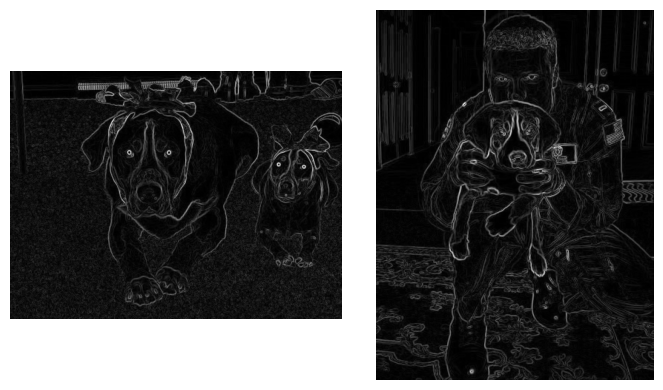

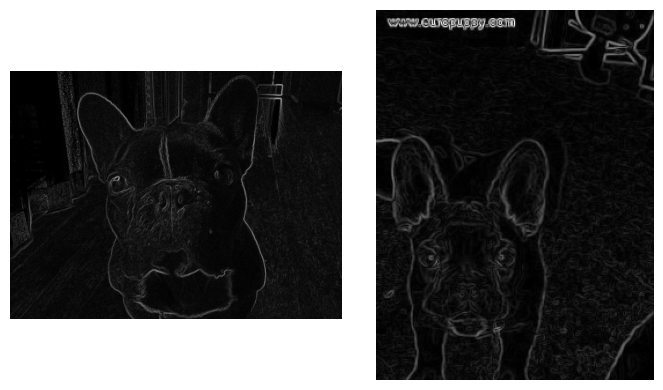

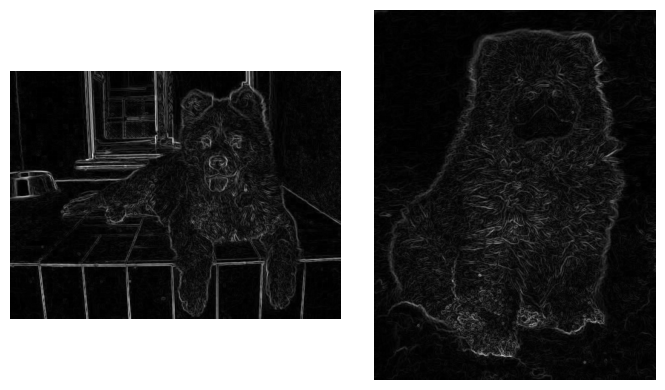

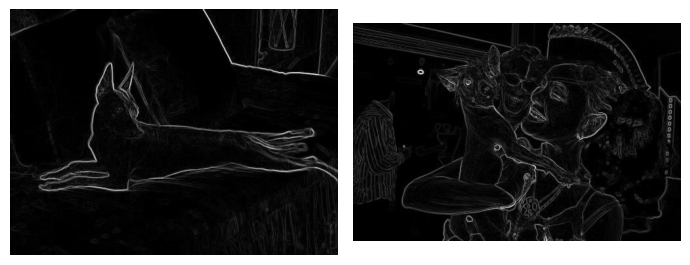

In [12]:
# perform edge detection and plot the images
from skimage import io, color, filters
import matplotlib.pyplot as plt
import os
def edge_detection_and_plot(folder_path):
    files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')][:2]
    fig, axes = plt.subplots(1, len(files), figsize=(7, 4))
    for i, file_name in enumerate(files):
        image_path = os.path.join(folder_path, file_name)
        image = io.imread(image_path)
        gray_image = color.rgb2gray(image)
        edge_sobel = filters.sobel(gray_image)
        axes[i].imshow(edge_sobel, cmap=plt.cm.gray)
        axes[i].axis('off')
    plt.tight_layout()
folders = {
    'GSM': 'n02107574-Greater_Swiss_Mountain_dog',
    'FG': 'n02108915-French_bulldog',
    'chow': 'n02112137-chow',
    'MH': 'n02113978-Mexican_hairless'
}
root_dir = r'D:\dm\Images'  
for name, folder_name in folders.items():
    folder_path = os.path.join(root_dir, folder_name)
    edge_detection_and_plot(folder_path)

plt.show()


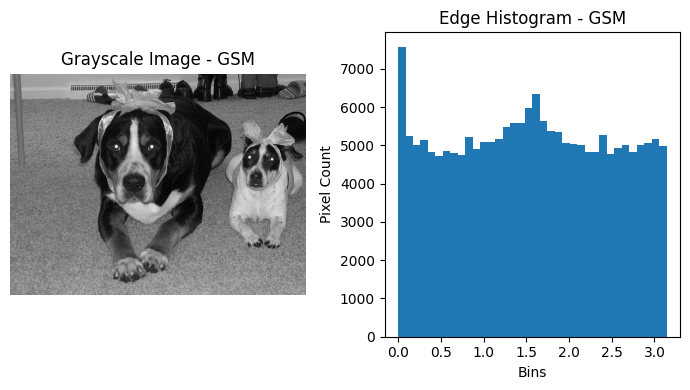

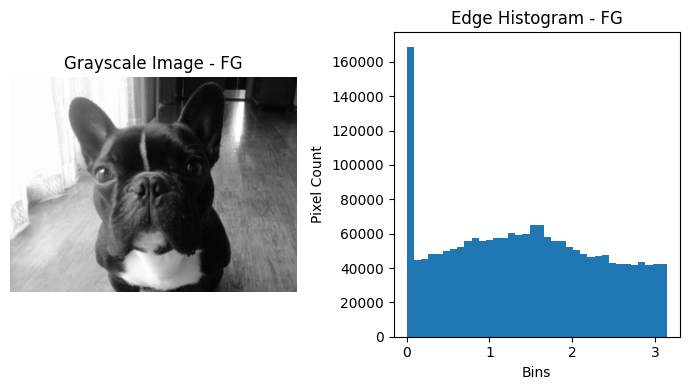

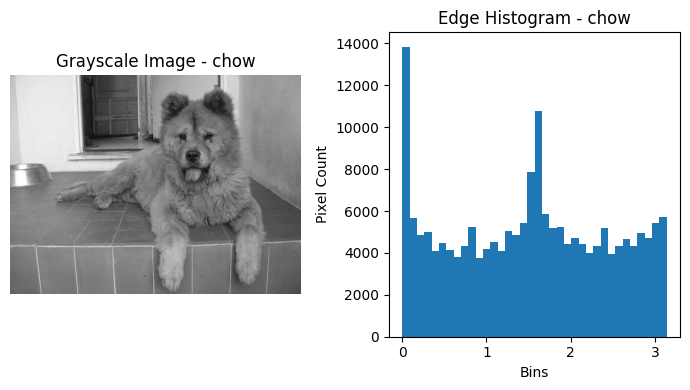

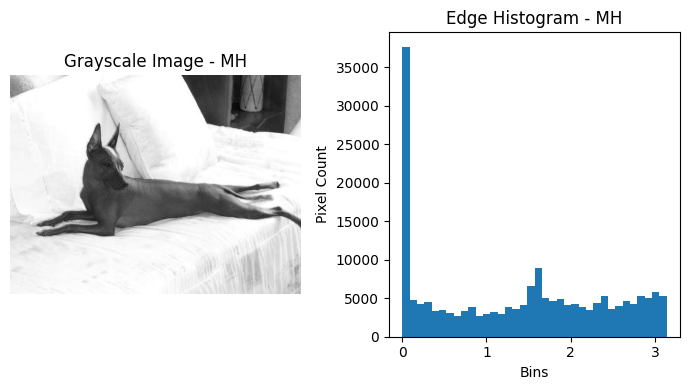

In [13]:
### Creation of an edge histogram
import numpy as np
from skimage import io, filters, color, exposure
import matplotlib.pyplot as plt
import os
def calculate_angle(horizontal, vertical):
    """Calculate the angles between horizontal and vertical operators."""
    return np.mod(np.arctan2(vertical, horizontal), np.pi)
def process_and_plot_edge_histogram(folder_path, class_label):
    files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')][0]
    
    image_path = os.path.join(folder_path, files)
    image = io.imread(image_path)
    
    grayscale_image = color.rgb2gray(image)
    
    horizontal_sobel = filters.sobel_h(grayscale_image)
    vertical_sobel = filters.sobel_v(grayscale_image)
    
    edge_angle = calculate_angle(horizontal_sobel, vertical_sobel)
    
    hist, hist_centers = exposure.histogram(edge_angle, nbins=36)

    fig, axes = plt.subplots(1, 2, figsize=(7, 4))

    axes[0].imshow(grayscale_image, cmap=plt.cm.gray)
    axes[0].set_title(f'Grayscale Image - {class_label}')
    axes[0].axis('off')

    axes[1].bar(hist_centers, hist, width=np.diff(hist_centers)[0])
    axes[1].set_xlabel('Bins')
    axes[1].set_ylabel('Pixel Count')
    axes[1].set_title(f'Edge Histogram - {class_label}')

    plt.tight_layout()
    plt.show()
folders = {
    'GSM': 'n02107574-Greater_Swiss_Mountain_dog',
    'FG': 'n02108915-French_bulldog',
    'chow': 'n02112137-chow',
    'MH': 'n02113978-Mexican_hairless'
}
root_dir = r'D:\dm\Images'  
for label, folder_name in folders.items():
    folder_path = os.path.join(root_dir, folder_name)
    process_and_plot_edge_histogram(folder_path, label)


In [5]:
### calculating edge histograms of images
import numpy as np
from skimage import io, filters, color
import os
from sklearn.metrics.pairwise import euclidean_distances as euclidean, manhattan_distances as manhattan, cosine_distances as cosine

def calculate_angle(horizontal, vertical):
    """Calculate the angles between horizontal and vertical operators."""
    return np.mod(np.arctan2(vertical, horizontal), np.pi)

def compute_edge_histogram(image_path):
    image_data = io.imread(image_path)
    if image_data.ndim == 3:
        image_data = color.rgb2gray(image_data)
    
    horizontal_sobel = filters.sobel_h(image_data)
    vertical_sobel = filters.sobel_v(image_data)
    edge_angle = calculate_angle(horizontal_sobel, vertical_sobel)
    
    hist, _ = np.histogram(edge_angle, bins=36, range=(0, np.pi), density=True)
    return hist

root_folder = r'D:\dm\Images'

category_folders = {
    'GSM': 'n02107574-Greater_Swiss_Mountain_dog',
    'FG': 'n02108915-French_bulldog'
}

same_category_images = {}
diff_category_images = {}

for category, folder_name in category_folders.items():
    folder_path = os.path.join(root_folder, folder_name)
    image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.jpg')]
    
    if category == 'GSM':
        same_category_images[category] = image_files[:2]
    elif category == 'FG':
        diff_category_images[category] = image_files[0]

histograms_data = []

for category, images in same_category_images.items():
    histograms_data.extend([compute_edge_histogram(img_path) for img_path in images])

histograms_data.append(compute_edge_histogram(diff_category_images['FG']))

euclidean_distance = euclidean(histograms_data)
manhattan_distance = manhattan(histograms_data)
cosine_distance = cosine(histograms_data)

print("Euclidean Distance:\n", euclidean_distance)
print("Manhattan Distance:\n", manhattan_distance)
print("Cosine Distance:\n", cosine_distance)


Euclidean Distance:
 [[0.         0.65420395 0.56095802]
 [0.65420395 0.         0.68643366]
 [0.56095802 0.68643366 0.        ]]
Manhattan Distance:
 [[0.         2.21751473 1.46486118]
 [2.21751473 0.         2.49070947]
 [1.46486118 2.49070947 0.        ]]
Cosine Distance:
 [[0.         0.05068172 0.03829412]
 [0.05068172 0.         0.05549184]
 [0.03829412 0.05549184 0.        ]]


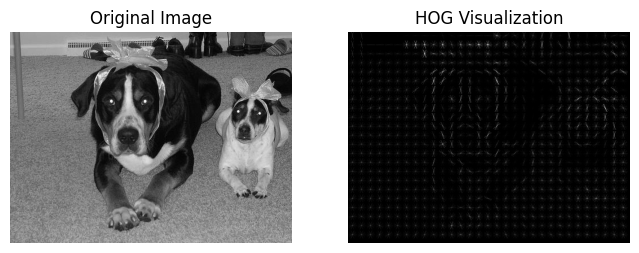

array([0.69775751, 0.09420315, 0.01569207, ..., 0.33333333, 0.33333333,
       0.33333333])

In [10]:
###finding HOG
from skimage.feature import hog
from skimage import exposure, io, color
import matplotlib.pyplot as plt
import os

def calculate_hog_and_display(image_path):
    img_data = io.imread(image_path)
    if img_data.ndim == 3:
        img_data = color.rgb2gray(img_data)

    hog_feats, hog_img = hog(img_data, pixels_per_cell=(16, 16), cells_per_block=(1, 1),
                             visualize=True, block_norm='L2-Hys')

    hog_img_rescaled = exposure.rescale_intensity(hog_img, in_range=(0, 10))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

    ax1.axis('off')
    ax1.imshow(img_data, cmap=plt.cm.gray)
    ax1.set_title('Original Image')

    ax2.axis('off')
    ax2.imshow(hog_img_rescaled, cmap=plt.cm.gray)
    ax2.set_title('HOG Visualization')
    plt.show()

    return hog_feats

def fetch_image_path():
    category_folder = 'n02107574-Greater_Swiss_Mountain_dog'
    root_directory = 'D:/dm/Images'
    img_path = os.path.join(root_directory, category_folder, os.listdir(os.path.join(root_directory, category_folder))[0])
    return img_path

def process_hog_extraction():
    img_path = fetch_image_path()
    hog_features = calculate_hog_and_display(img_path)
    return hog_features

process_hog_extraction()


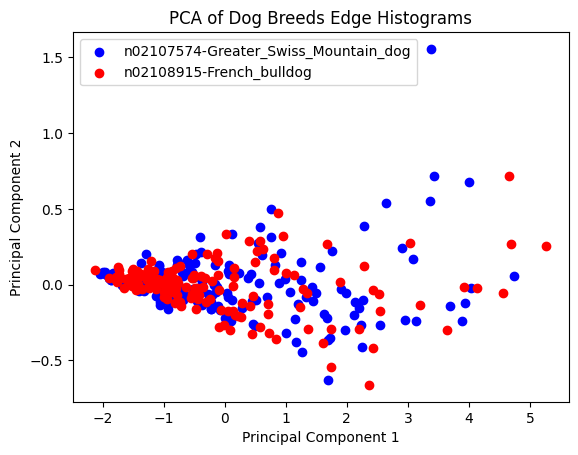

In [12]:
### Principal Component Analysis (PCA)
import os
from skimage import io, color, filters
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

def compute_edge_histogram(image):
    edge_sobel = filters.sobel(image)
    hist, _ = np.histogram(edge_sobel, bins=36, range=(0, np.pi), density=True)
    return hist

image_directory = 'D:/dm/Images'

class_labels = ['n02107574-Greater_Swiss_Mountain_dog',
    'n02108915-French_bulldog']

histograms = []
labels = []

for label in class_labels:
    class_path = os.path.join(image_directory, label)
    image_files = [f for f in os.listdir(class_path) if f.endswith('.jpg')]
    
    for img_file in image_files:
        img_path = os.path.join(class_path, img_file)
        if os.path.exists(img_path):
            image = io.imread(img_path)
            if image.ndim == 3:
                image = color.rgb2gray(image)
            hist = compute_edge_histogram(image)
            histograms.append(hist)
            labels.append(label)

histograms_array = np.array(histograms)

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(histograms_array)

colors = ['blue', 'red']
for i, label in enumerate(class_labels):
    indices = [index for index, lab in enumerate(labels) if lab == label]
    class_data = reduced_data[indices, :]
    plt.scatter(class_data[:, 0], class_data[:, 1], c=colors[i], label=label)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dog Breeds Edge Histograms')
plt.legend()
plt.show()
